# Hypothesis Testing

## One sample t-test

 Vérification de l’hypothèse sur le taux de glycémie

Nous avons **100 patients** et nous voulons vérifier si leur niveau moyen de glycémie est **normal**, c’est-à‑dire **autour de 5.7**.

$H_0: \mu=5.7$   
$H_1: \mu\neq5.7$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
patients = np.random.normal(6, 1.7, 100)

(array([ 4.,  3., 11., 14., 18., 26., 11.,  7.,  4.,  2.]),
 array([ 1.48192719,  2.42434643,  3.36676567,  4.30918491,  5.25160415,
         6.19402339,  7.13644263,  8.07886187,  9.02128111,  9.96370035,
        10.90611959]),
 <BarContainer object of 10 artists>)

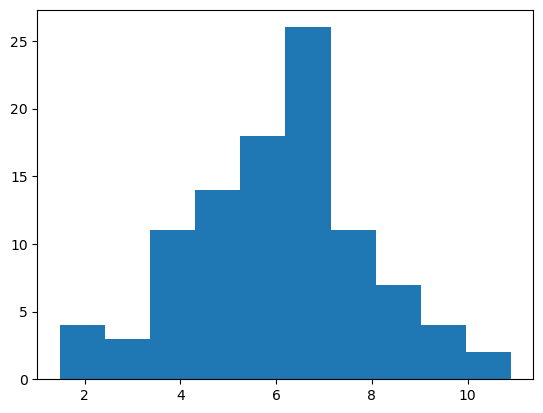

In [5]:
plt.hist(patients)

In [6]:
from scipy.stats import ttest_1samp

In [5]:
ttest_1samp(patients, 5.7)

TtestResult(statistic=0.6236122196418769, pvalue=0.5343164805941842, df=99)

## 📊 Interprétation de la sortie du test t

Dans la sortie du test t, nous observons **2 paramètres principaux** :

- **statistic** — la *valeur t observée*.  
  Avec un niveau de signification de **5%**, on peut comparer cette valeur à la *valeur t critique* (**1,96** pour un test bilatéral approximativement).  
  Puisque la valeur t critique est supérieure à la valeur t observée, nous **échouons à rejeter l’hypothèse nulle**.

- **pvalue** — la probabilité de se tromper en rejetant l’hypothèse nulle \( H_0 \).  
  Ici, la *p-value* est **0,5**, ce qui est largement supérieur au seuil de 0,05.  
  Par conséquent, nous **échouons à rejeter \( H_0 \)**.


In [6]:
patients = np.random.normal(6, 1.7, 100)
ttest_1samp(patients, 5.7)

TtestResult(statistic=1.2454611764420687, pvalue=0.2159019839035361, df=99)

In the simulation #2 we can see that pvalue is below significance level, hence we happily reject the Null Hypothesis. The value of statistics is positive, so we conclude that the avg glycose level in hospital is above normal value. Hence, we have much more sick people. Hooray!

In [7]:
patients.mean()

5.913412309024858

## Paired two sample t-test

In [8]:
import pandas as pd

In [9]:
df=pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/blood_pressure.csv')

In [10]:
df.head()

,before,after
0,136.713072,92.432965
1,134.735618,105.022643
2,127.529115,82.242766
3,144.527126,93.607172
4,124.214720,103.212223


In [11]:
from scipy.stats import ttest_rel

In [12]:
ttest_rel(df.before, df.after)

TtestResult(statistic=27.29184176756024, pvalue=7.303035069607835e-48, df=99)

According to the results of the paired ttest, we can see the following:
1. pvalue is 0. It is way smaller than significance level (no matter which one you choose, since our pvalue is $7*10^-48$. Hence, reject $H_0$.
2. t-statistics is outside the critical region (27 is outside of pretty much any critical region). Hence, we reject the Null Hypothesis.
3. The value of statistics is positive, hence we conclude that **before is higher than after**. 

In [13]:
df.mean()

before    136.536953
after      99.236700
dtype: float64

In [14]:
import seaborn as sns

C:\Users\Kered\AppData\Local\Temp\ipykernel_14580\3105987615.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.before)
C:\Users\Kered\AppData\Local\Temp\ipykernel_14580\3105987615.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.after)


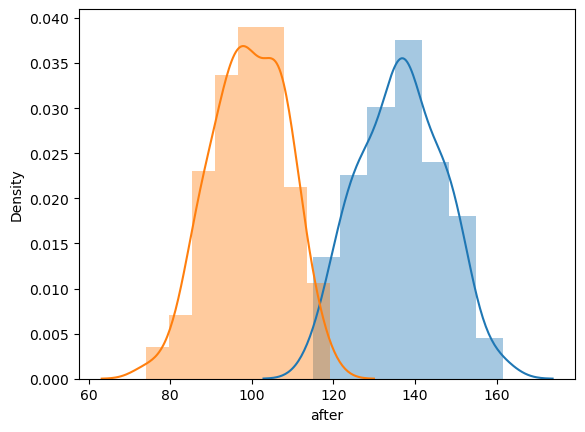

In [15]:
sns.distplot(df.before)
sns.distplot(df.after)
plt.show()

In [16]:
ttest_1samp(df.after-df.before, 0)

TtestResult(statistic=-27.29184176756024, pvalue=7.303035069607835e-48, df=99)

## Independent 2 sample t-test

In [17]:
df2=pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/ab_test.csv')

In [18]:
df2.head()

,a,b
0,0.27,13.61
1,6.08,21.53
2,13.74,9.23
3,9.70,5.36
4,7.00,12.90


In [19]:
from scipy.stats import ttest_ind

### Equal variance case

In [20]:
ttest_ind(df2.a, df2.b)

TtestResult(statistic=-2.637533181209767, pvalue=0.009713140852447347, df=98.0)

Given the pvalue of 0.0097 I reject the Null Hypothesis. The difference between version a and version b is statistically significant with 5% significance level. And given the statistics sign, I can deduce that the version b has higher mean than version a.

### Unequal variance case

In [21]:
ttest_ind(df2.a, df2.b, equal_var=False)

TtestResult(statistic=-2.637533181209767, pvalue=0.009776243024828825, df=93.79317907867807)

## One-sided test

Now I want to test 1 sided hypothesis that avg glycose level in the hospital is below the norm. Significance level is 5%.

$H_0: \mu=5.7$   
$H_1: \mu<5.7$

In [22]:
patients = np.random.normal(6, 1.7, 100)
ttest_1samp(patients, 5.7)

TtestResult(statistic=1.9805006774473846, pvalue=0.05042234406949329, df=99)

As we can see the pvalue is 0.087, but we should remember that this pvalue is calculated for the two-sided test.   
Hence, we can adjust it to 1sided test by dividing it by 2. We can see that 4% is below 5% significance level. Hence, we conclude that the observed statistics is outside of the confidence interval. **But** we also can notice that statistics is positive. That means that the avg value of patients is above critical region. Which violates the alternative hypothesis. Hence, **we fail to reject the Null Hypothesis.**

In [23]:
patients.mean()

6.0347702683772875

In [24]:
from statsmodels.api import stats
stats.ttest_ind(patients, [5.7]*len(patients))

(1.980500677447385, 0.04903199127397982, 198.0)

In [25]:
stats.ttest_ind(df2.a, df2.b, alternative='smaller')

(-2.637533181209764, 0.004856570426223712, 98.0)

In [26]:
stats.ttest_ind(df2.a, df2.b, alternative='two-sided')

(-2.637533181209764, 0.009713140852447424, 98.0)